# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

# Read the Data Set

In [2]:
sms=pd.read_csv('spam.csv', encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN



# Exploring Data

In [3]:
#Gives Number of Rows and Columns in data set respectively
sms.shape

(5572, 5)

In [4]:
#Gives total information about data set
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# DataCleaning 

In [5]:
#Drop unwanted columns(having null values)
sms=sms.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)5
sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Renaming 

In [6]:
#Renaming columns: v1 and v2 -> Category and Text respectively
sms=sms.rename(columns={"v1":"Category","v2":"Text"})
sms.head()

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# check for missing values
sms.isnull().sum()

Category    0
Text        0
dtype: int64

In [8]:
# check for duplicate values
sms.duplicated().sum()

403

In [9]:
# remove duplicates
sms = sms.drop_duplicates(keep='first')
sms.duplicated().sum()

0

After Removing Null Values

In [10]:
#How many ham and spam messages in data?
sms.Category.value_counts() 

Category
ham     4516
spam     653
Name: count, dtype: int64

In [11]:
#More Info on Columns
sms.describe()

,Category,Text
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


# Data Visualisation

The Pie chart illustrates the distribution of ham and spam messages in the dataset. It shows the proportion of each category out of the total messages.

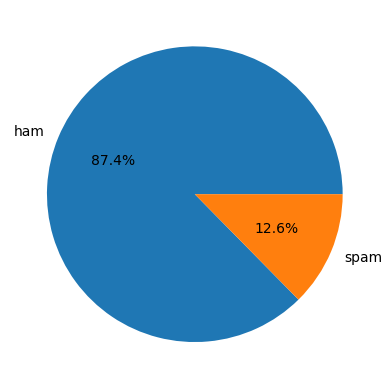

In [12]:
import matplotlib.pyplot as plt
plt.pie(sms['Category'].value_counts(), labels=['ham','spam'],autopct='%1.1f%%')
plt.show()

The Bar chart compares the number of ham and spam messages in the dataset. It provides a clear representation of the distribution of ham and spam messages.



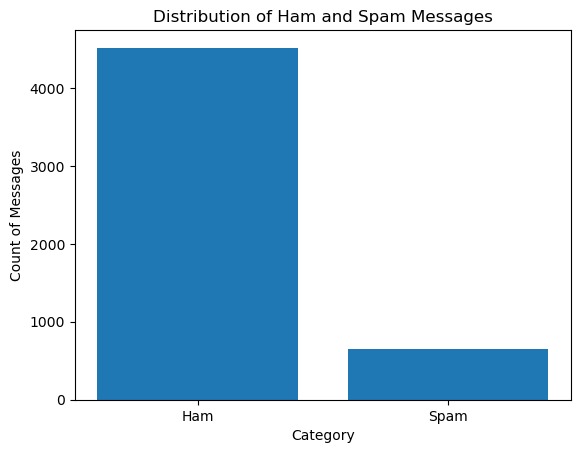

In [13]:
spam_count = sms[sms['Category'] == 'spam'].shape[0]
ham_count = sms[sms['Category'] == 'ham'].shape[0]

categories = ['Ham', 'Spam']
message_counts = [ham_count, spam_count]
plt.bar(categories, message_counts)
plt.xlabel('Category')
plt.ylabel('Count of Messages')
plt.title('Distribution of Ham and Spam Messages')
plt.show()

In [14]:
#Data is Imbalanced

In [14]:
sms['No of Characters']=sms['Text'].apply(len)
sms.head()

,Category,Text,No of Characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


The Histogram visualizes the distribution of word lengths in both categories, providing insights into the characteristics of the text. It helps to identify any differences or patterns in the word lengths between ham and spam messages.

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

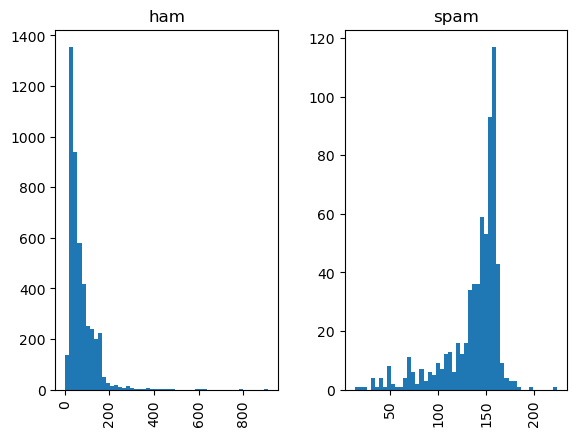

In [15]:
#Comparing Number of Characters in Text
import seaborn as sns
sms.hist(column='No of Characters', by='Category', bins=50)

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aakas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
# how many number of words does message have?
sms['No of Words'] = sms['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
sms.head()

,Category,Text,No of Characters,No of Words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

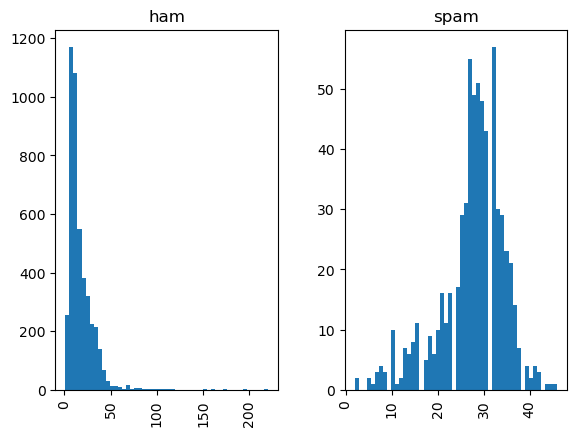

In [18]:
#comparison in terms of no of words in ham and spam
import seaborn as sns
sms.hist(column='No of Words', by='Category', bins=50)

In [19]:
#how many number of sentences does message have?
sms['No of Sentences'] = sms['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
sms.head()

,Category,Text,No of Characters,No of Words,No of Sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

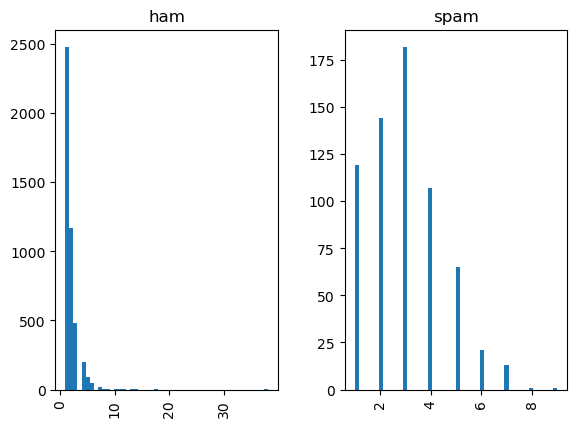

In [25]:
#comparison in terms of no of sentences in ham and spam
import seaborn as sns
sms.hist(column='No of Sentences', by='Category', bins=50)

In [20]:
#Gives statistical values of ham and spam messgaes
sms[['No of Characters','No of Words','No of Sentences']].describe()

,No of Characters,No of Words,No of Sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


C:\Users\aakas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


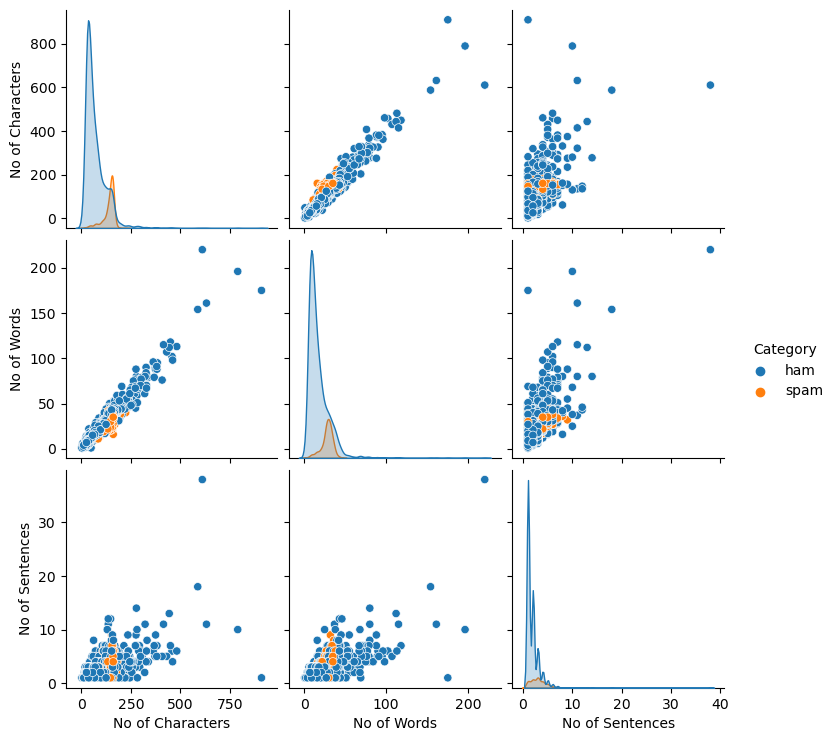

In [21]:
sns.pairplot(sms,hue='Category')

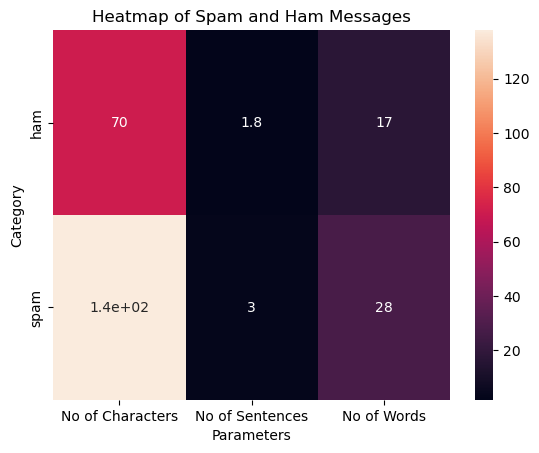

In [22]:
heatmap_data = sms.pivot_table(index='Category', values=['No of Characters', 'No of Words', 'No of Sentences'])
sns.heatmap(heatmap_data, annot=True)
plt.xlabel('Parameters')
plt.ylabel('Category')
plt.title('Heatmap of Spam and Ham Messages')
plt.show()